# 01 Markov State Model

In [1]:
using PyPlot, Random
using Revise, MDToolbox
ENV["COLUMNS"] = 100; # display width for MDToolbox
Random.seed!(777);

┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1278


In [2]:
#t = MDToolbox.load("../ak.pdb")
t = mdload("data/1yrf.pdb")

1x582 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 1LEU                       |  …   35PHE                      |
| 1N                         | 2H1                        |  …   582OXT                     |
|    -7.40     9.81     7.91 |    -8.22     9.66     7.60 |  …     -14.90    16.49     8.30 |

In [3]:
index = select_atom(t, "atomname CA")

35-element Array{Int64,1}:
   5
  24
  35
  47
  62
  74
  94
 116
 126
 142
 162
 169
 186
   ⋮
 365
 387
 404
 421
 438
 457
 479
 501
 516
 538
 545
 564

In [4]:
t[:, index]

1x35 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 2SER                       |  …   35PHE                      |
| 1CA                        | 2CA                        |  …   35CA                       |
|    -6.43     9.30     6.99 |    -2.63     9.12     7.22 |  …     -15.68    14.56     7.08 |

In [5]:
#t = load("../ak.nc", index=index, top=t)
t = mdload("data/all_stride100.nc", index=index, top=t)

325001x35 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 2SER                       |  …   35PHE                      |
| 1CA                        | 2CA                        |  …   35CA                       |
|    -6.43     9.30     6.99 |    -2.63     9.12     7.22 |  …     -15.68    14.56     7.08 |
|    45.52   -13.34    39.18 |    49.36   -13.09    38.64 |         41.88     2.56    46.47 |
|    47.60   -14.15    34.86 |    51.09   -13.00    36.01 |         42.84     5.06    48.31 |
|    45.56   -13.17    36.88 |    49.31   -12.53    37.23 |         41.19     1.18    47.38 |
|    46.26   -12.63    36.16 |    50.06   -12.71    36.70 |         40.38     3.74    46.40 |
|    49.31   -16.29    35.70 |    51.93   -13.69    34.74 |  …      40.41     2.54    47.74 |
|    49.95   -16.06    34.63 |    52.57   -13.36    35.52 |         41.14     4.71    47.48 |
|    45.35   -14.80    37.

In [6]:
t = superimpose(t[1, :], t)

325001x35 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 2SER                       |  …   35PHE                      |
| 1CA                        | 2CA                        |  …   35CA                       |
|    -6.43     9.30     6.99 |    -2.63     9.12     7.22 |  …     -15.68    14.56     7.08 |
|    -2.06     8.40    10.61 |     0.07    11.41     9.41 |        -18.33    12.93     4.76 |
|     2.00     8.02     8.67 |     2.43    11.77     7.87 |        -20.31    15.15     3.78 |
|    -0.78     7.63     9.59 |     0.48    11.13     8.71 |        -18.23    12.07     6.25 |
|    -0.47     8.00     8.75 |     1.24    11.43     8.50 |        -19.65    11.88     3.81 |
|     3.86     9.65    10.57 |     4.10    11.87     7.47 |  …     -19.61    12.03     5.84 |
|     4.48     9.05     8.98 |     3.67    12.33     7.12 |        -20.62    13.61     4.17 |
|    -0.70     7.01    10.

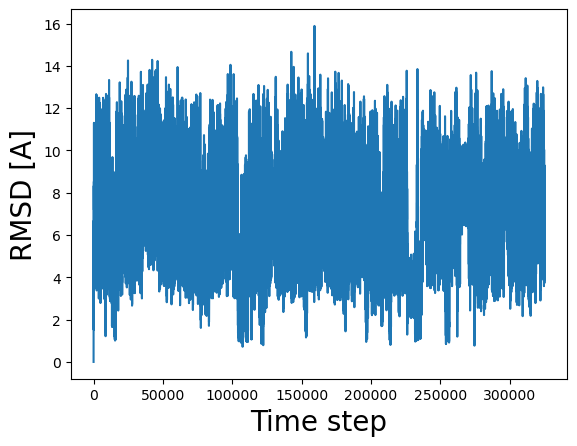

PyObject Text(38.00000000000001, 0.5, 'RMSD [A]')

In [7]:
rmsd = compute_rmsd(t[1, :], t)
plot(rmsd)
xlabel("Time step",fontsize=20)
ylabel("RMSD [A]",fontsize=20)

In [8]:
?Style

search: IndexStyle printstyled ksdensity_serial

Couldn't find Style
Perhaps you meant Some, Sys, table, title, @time, angle, ctime, eltype or htol


No documentation found.

Binding `Style` does not exist.


In [9]:
using Bio3DView
viewstruc(t[1, :], style=Style("sphere", Dict("color"=> "spectrum")))

HTML{String}("<script type='text/javascript'>/*! jQuery v3.3.1 | (c) JS Foundation and other contributors | jquery.org/license */\n!function(e,t){\"use strict\";\"object\"==typeof module&&\"object\"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error(\"jQuery requires a window with a document\");return t(e)}:t(e)}(\"undefined\"!=typeof window?window:this,function(e,t){\"use strict\";var n=[],r=e.document,i=Object.getPrototypeOf,o=n.slice,a=n.concat,s=n.push,u=n.indexOf,l={},c=l.toString,f=l.hasOwnProperty,p=f.toString,d=p.call(Object),h={},g=function e(t){return\"function\"==typeof t&&\"number\"!=typeof t.nodeType},y=function e(t){return null!=t&&t===t.window},v={type:!0,src:!0,noModule:!0};function m(e,t,n){var i,o=(t=t||r).createElement(\"script\");if(o.text=e,n)for(i in v)n[i]&&(o[i]=n[i]);t.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+\"\":\"object\"==typeof e||\"function\"==typeof e?l[c.call(e)]||\"object\":typeof e}var b=\"3.3.1\",w=function(e,t){return new w.fn.init(e,t)},T=/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+\$/g;w.fn=w.prototype={jquery:\"3.3.1\",constructor:w,length:0,toArray:function(){return o.call(this)},get:function(e){return null==e?o.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=w.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return w.each(this,e)},map:function(e){return this.pushStack(w.map(this,function(t,n){return e.call(t,n,t)}))},slice:function(){return this.pushStack(o.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(n>=0&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:n.sort,splice:n.splice},w.extend=w.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for(\"boolean\"==typeof a&&(l=a,a=arguments[s]||{},s++),\"object\"==typeof a||g(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)n=a[t],a!==(r=e[t])&&(l&&r&&(w.isPlainObject(r)||(i=Array.isArray(r)))?(i?(i=!1,o=n&&Array.isArray(n)?n:[]):o=n&&w.isPlainObject(n)?n:{},a[t]=w.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},w.extend({expando:\"jQuery\"+(\"3.3.1\"+Math.random()).replace(/\\D/g,\"\"),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||\"[object Object]\"!==c.call(e))&&(!(t=i(e))||\"function\"==typeof(n=f.call(t,\"constructor\")&&t.constructor)&&p.call(n)===d)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e){m(e)},each:function(e,t){var n,r=0;if(C(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},trim:function(e){return null==e?\"\":(e+\"\").replace(T,\"\")},makeArray:function(e,t){var n=t||[];return null!=e&&(C(Object(e))?w.merge(n,\"string\"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:u.call(t,e,n)},merge:function(e,t){for(var n=+t.length,r=0,i=e.length;r<n;r++)e[i++]=t[r];return e.length=i,e},grep:function(e,t,n){for(var r,i=[],o=0,a=e.length,s=!n;o<a;o++)(r=!t(e[o],o))!==s&&i.push(e[o]);return i},map:function(e,t,n){var r,i,o=0,s=[];if(C(e))for(r=e.length;o<r;o++)null!=(i=t(e[o],o,n))&&s.push(i);else for(o in e)null!=(i=t(e[o],o,n))&&s.push(i);return a.apply([],s)},guid:1,support:h}),\"function\"==typeof Symbol&&(w.fn[Symbol.iterator]=n[Symbol.iterator]),w.each(\"Boolean Number String Function Array Date RegExp Object Error Symbol\".split(\" \"),function(e,t){l[\"[object \"+t+\"]\"]=t.toLowerCase()});function C(e){var t=!!e&&\"length\"in e&&e.length,n=x(e);return!g(e)&&!y(e)&&(\"array\"===n||0===t||\"number\"==typeof t&&t>0&&t-1 in e)}var E=function(e){var t,n,r,i,o,a,s,u,l,c,f,p,d,h,g,y,v,m,x,b=\"sizzle\"+1*new Date,w=e.document,T=0,C=0,E=ae(),k=ae(),S=ae(),D=function(e,t){return e===t&&(f=!0),0},N

# Feature extraction and dimensional reduction

First, we compute distance-map vectors for each fram by calling `compute_distancemap()` function

In [10]:
X = compute_distancemap(t)

325001×528 Array{Float64,2}:
 7.89933  5.85188   5.94069   9.49252  10.2384  …  5.26846  6.27684  7.49441   9.66232  8.88368
 8.50817  7.00025   9.64637  12.595    13.5787     6.74683  6.47582  8.17173   9.44661  8.55033
 8.04062  6.47848   9.32129  11.8972   13.1739     5.88217  4.61305  7.75496   8.00677  7.87567
 8.24729  6.7526    9.33815  12.149    12.5471     6.40686  8.33347  7.9987   10.943    9.66315
 8.12258  5.82863   8.14704  10.921    11.5195     6.4681   7.49529  8.05406  10.0904   8.81301
 9.05469  8.69891  12.0555   14.0325   15.4729  …  6.86724  8.59181  8.47824  11.1277   9.58356
 8.29563  7.24198   9.90614  12.2051   13.4218     6.4855   7.12913  8.21236  10.1123   9.06676
 8.77351  7.84755  10.6097   13.1113   13.3386     6.62716  6.32367  8.25358   9.06616  8.43631
 7.6784   6.87895  10.0293   12.3521   13.6506     6.55582  7.37944  8.33597  10.3802   8.93563
 8.87195  7.54684   9.67746  12.5864   13.5665     6.50601  6.36308  8.2513    9.546    8.67297
 8.43729  6

In [11]:
#PCA = pca(X)
TICA = tica(X, 100)

(projection = [-0.18033379647567271 -0.04373676333184295 … -0.046867970752883965 -0.027620557459550096; -0.25278732987652 -0.07750072034732125 … 0.07847181241112676 -0.001175636550497414; … ; 0.226373318960782 -0.010899822749406568 … 0.04113281190132962 -0.03695553709433499; 0.13815873354312164 -0.02161025454763496 … -0.3021101718190027 -0.08935273988544817], mode = [-2.733525679964712e-5 0.0005333669848807368 … 0.002335333707180584 -0.0008827130911521764; -7.169188338839844e-5 -0.0005609749313049144 … -0.0014771148197267779 0.0012375654820573046; … ; -0.009133226519649587 0.0016331665010529373 … -0.0002471504422214532 0.00902481958296005; 0.000542718535780709 -0.00046396019962738675 … -0.0006223841937457105 -0.00317751394104039], variance = [0.9432688803426968, 0.9336574819081327, 0.9009147394119769, 0.869465084003377, 0.8502762271399039, 0.802466732441991, 0.78327680939232, 0.763389366213955, 0.7402298115374595, 0.7306576337076901  …  -0.0896218305047613, -0.09305273386920178, -0.096

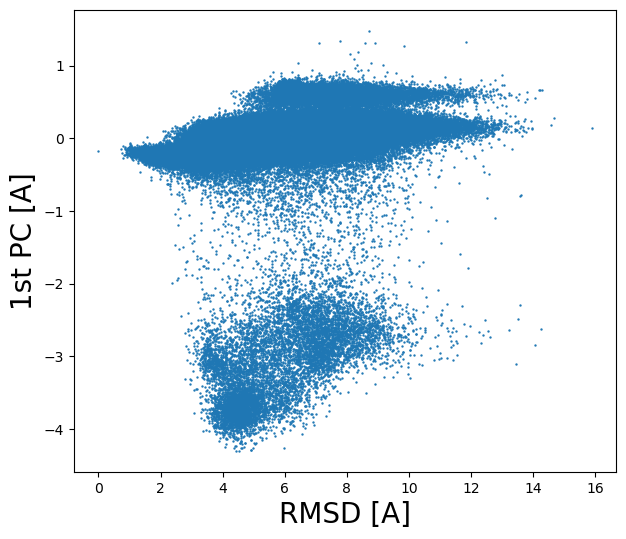

PyObject Text(38.0, 0.5, '1st PC [A]')

In [12]:
#pyplot(size=(500,400))
#scatter(F.projection[:, 1], F.projection[:, 2], markersize=2.0, color=:black, label=nothing, framestyle=:box)
#xlabel!("1st PC [A]"); ylabel!("2nd PC [A]")

fig, ax = subplots(figsize=(7, 6))
ax.scatter(rmsd, TICA.projection[:, 1], s=0.5)
#ax.scatter(TICA.projection[:, 1], TICA.projection[:, 2], s=0.5)
xlabel("RMSD [A]",fontsize=20)
ylabel("1st PC [A]",fontsize=20)

# Clustering

In [13]:
CLUST = clusterkcenters(TICA.projection[:, 1:5], 100)

1 iteration  distance_max = 0.885484  kcluster = 100
2 iteration  distance_max = 0.882879  kcluster = 100
3 iteration  distance_max = 0.882879  kcluster = 100
4 iteration  distance_max = 0.880054  kcluster = 100
5 iteration  distance_max = 0.880054  kcluster = 100
6 iteration  distance_max = 0.877479  kcluster = 100
7 iteration  distance_max = 0.870702  kcluster = 100
8 iteration  distance_max = 0.870702  kcluster = 100
9 iteration  distance_max = 0.870702  kcluster = 100
10 iteration  distance_max = 0.870702  kcluster = 100


(indexOfCluster = [67, 67, 15, 67, 67, 67, 67, 67, 15, 67  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], center = [0.17786226818850293 -0.04739508292222003 … 0.3302035668609469 0.7883827293789573; 0.2960753681557566 -0.0202044224799975 … -0.892988803288403 -5.157450538928011; … ; -0.5715337207410026 -0.008251243549045965 … 0.005073456361827135 0.39156925020320976; -0.183204179116191 0.013005651961944246 … -0.7090890754295025 -0.6931619587216407], distanceFromCenter = [0.12611615189832004; 0.3378321529611235; … ; 0.1828634408674009; 0.05027186662069534], indexOfCenter = [95345, 296602, 135661, 193292, 265485, 98576, 258168, 136964, 133566, 25769  …  43201, 198056, 138295, 5219, 139289, 258146, 133575, 12024, 265478, 24799])

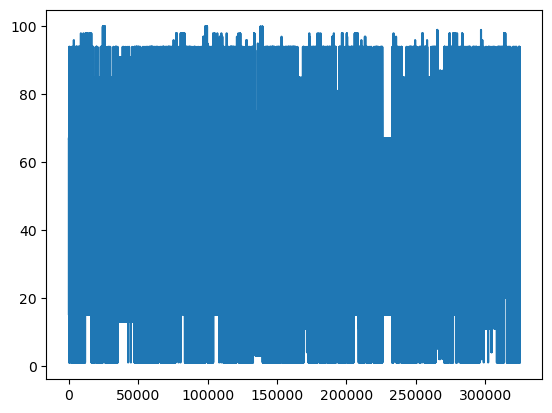

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd1cf7343a0>

In [14]:
plot(CLUST.indexOfCluster)

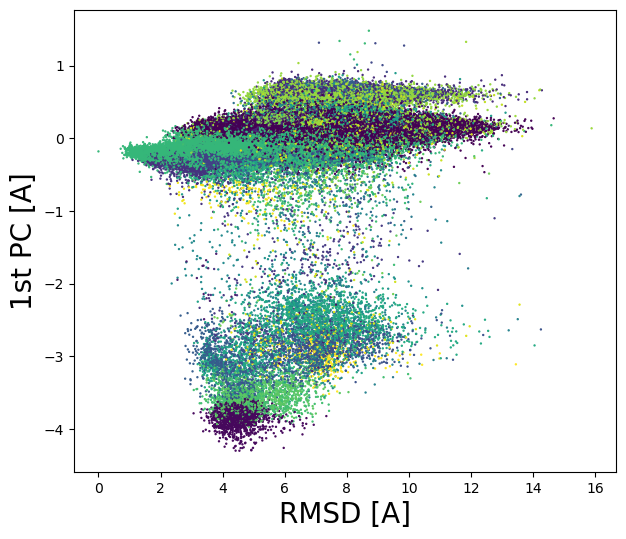

PyObject Text(38.0, 0.5, '1st PC [A]')

In [15]:
#gr(size=(500,400))
#scatter(PCA.projection, PCA.projection, markersize=2.0, color=CLUST.indexOfCluster, label=nothing, framestyle=:box)
#        markerstrokewidth = 0.1)
#xlabel!("1st PC [A]"); ylabel!("2nd PC [A]")

fig, ax = subplots(figsize=(7, 6))
ax.scatter(rmsd, TICA.projection[:, 1], s=0.5, c=CLUST.indexOfCluster)
xlabel("RMSD [A]",fontsize=20)
ylabel("1st PC [A]",fontsize=20)

# Estimation of transition probability matrix from data

Likelihood function of observing the data given a transition probability matrix $T$

\begin{aligned}
  L(T) =  P({\rm data} | T) = \prod_i \prod_j T_{ij}^{C_{ij}}
\end{aligned}

Here, $C_{ij}$ is a counting matrix whose elements represents the number of transitions between states obesrved in the given data

First, we compute the counting matrix from the result of the clustering

In [29]:
# compute counting matrix
C = msmcountmatrix(CLUST.indexOfCluster, tau=300)

100×100 Array{Int64,2}:
 94612   1    0   0  0  0  420  0  0   0  1578  1  …   0  0   34  53  2  2514  2  4  8  23  0   8
     3  15    0   0  0  0    2  0  0   0     0  0      0  0    0   0  0     1  0  0  0   0  0   0
     0   0  634   0  0  1    0  9  0   0     0  0      0  0    0   0  1     0  3  0  0   0  0   0
     9   0    0   0  0  0    8  0  0   0    66  0      0  0    0   0  0     0  0  8  0   0  0   0
     0   0    0   0  0  0    0  0  0   0     0  0      0  0    0   0  0     0  0  0  0   0  0   0
     5   0    0   0  0  0    0  0  0   2     0  0  …   0  0    0   0  0     0  1  0  0   0  0  18
   303   4    0   0  0  0  154  0  0   0    13  0      0  0    1   1  0    39  0  0  0   0  1   0
     0   0   10   0  0  0    0  0  0   0     0  0      0  0    0   0  0     0  0  0  0   0  0   0
     0   0    0   0  0  0    0  0  0   0     0  0      0  0    0   0  0     0  0  0  0   0  0   0
    21   0    0   0  0  1    0  0  0   4     0  0      0  0    0   0  0     0  1  0  0   0  0 

Then, we estimate the transition probability matrix by maximizing the likelihood function given above

In [30]:
T, p = msmtransitionmatrix(C)

10 iteration  LogLikelihood = -4.71005e+05  delta = 1.09089e-03  tolerance = 1.00000e-04


([0.679674552336941 1.4359233756179595e-5 … 0.0 0.00016150609379069253; 0.007940903733982877 0.05952204249983487 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.04938160399602192 0.0 … 0.0 0.12499982867831787], [0.4294103039250485, 0.0007764862965136647, 0.004621652690187402, 0.0006253446025857176, 9.243804184166739e-6, 0.0001232078120054809, 0.004694023394828189, 4.6173078281861394e-5, 9.236990343609485e-6, 0.00026799345494189845  …  0.0017004999849431766, 0.0003697392520125803, 0.00012620375887336996, 0.01605580852338212, 0.00045887867430809495, 8.62974795641877e-5, 0.0002704628932448299, 0.0005379480093967931, 2.1569963130558708e-5, 0.0014044173378004398])

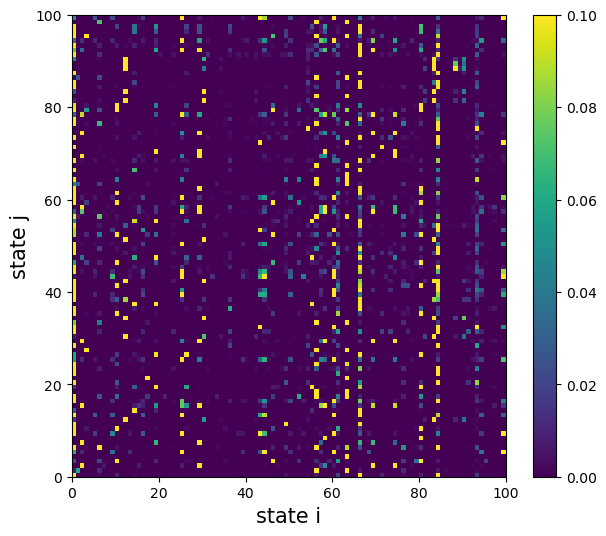

PyObject Text(30.000000000000007, 0.5, 'state j')

In [33]:
#pyplot(size=(500,400))
#heatmap(T, aspect_ratio=:equal, color=:thermal, clim=(0, 1))
#xlabel!("state i"); ylabel!("state j")

fig, ax = subplots(figsize=(7, 6))
plt = ax.pcolor(T, vmin=0, vmax=0.1)
cbar = fig.colorbar(plt, ax=ax)
#ax.colorbar()
xlabel("state i",fontsize=15)
ylabel("state j",fontsize=15)

In [34]:
msmplot(T, x=rmsd[CLUST.indexOfCenter], y=CLUST.center[:, 1], filename="msm.png", dpi=150)

# Validation

In [35]:
tau = 1:500
implied_time = msmimpliedtime(CLUST.indexOfCluster, tau)

500×99 Array{Union{Missing, Float64},2}:
  146.375   108.673    72.9149    23.8447  …  missing  missing  missing  missing  missing
  251.145   214.185   127.135     43.2272     missing  missing  missing  missing  missing
  365.303   306.206   170.875     62.3458     missing  missing  missing  missing  missing
  454.495   387.119   209.806     79.6376     missing  missing  missing  missing  missing
  531.573   484.277   241.336     95.7303     missing  missing  missing  missing  missing
  637.213   577.038   265.002    111.407   …  missing  missing  missing  missing  missing
  727.063   686.221   291.768    127.51       missing  missing  missing  missing  missing
  803.495   761.296   310.636    141.448      missing  missing  missing  missing  missing
  896.435   843.578   333.399    156.321      missing  missing  missing  missing  missing
  976.667   922.721   353.633    168.149      missing  missing  missing  missing  missing
 1059.81    987.929   372.124    182.29    …  missing  miss

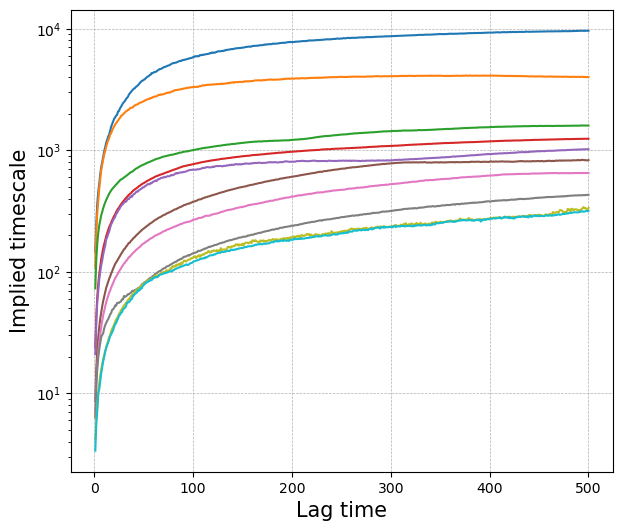

PyObject Text(30.000000000000007, 0.5, 'Implied timescale')

In [36]:
#pyplot(size=(400,300))
#plot(tau, implied_time[:, 1:10], framestyle=:box, yaxis=:log, label=nothing)
#xlabel!("delay tau"); ylabel!("implied time")

fig, ax = subplots(figsize=(7, 6))
ax.semilogy(tau, implied_time[:, 1:10])
ax.grid(linestyle="--", linewidth=0.5);
xlabel("Lag time",fontsize=15)
ylabel("Implied timescale",fontsize=15)

# Export MSM data

In [37]:
#using BSON: @save, @load
#
#@save "msm.bson" T p TICA CLUST t

In [41]:
using JLD2
@save "msm.jld2" T p TICA CLUST t